In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# 1. Load the preprocessed dataset
# We use the 'final' version from Notebook 02
try:
    df = pd.read_csv('kidney_disease_final.csv')
    X = df.drop('classification', axis=1)
    y = df['classification']
    
    # Re-establish the split exactly as before
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Re-train the optimal model (K=5 was found in Notebook 03)
    final_knn = KNeighborsClassifier(n_neighbors=5)
    final_knn.fit(X_train, y_train)
    
    # Define the scaler again for inference (crucial for new data)
    scaler = MinMaxScaler()
    scaler.fit(X) # Fitting on the full feature set
    
    print("Environment Restored: Model, Scaler, and Data are ready.")
except FileNotFoundError:
    print("Error: 'kidney_disease_final.csv' not found. Please run Notebook 02 first.")

Environment Restored: Model, Scaler, and Data are ready.


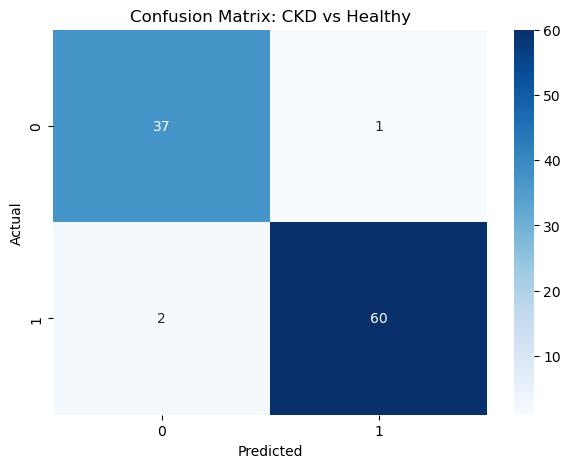

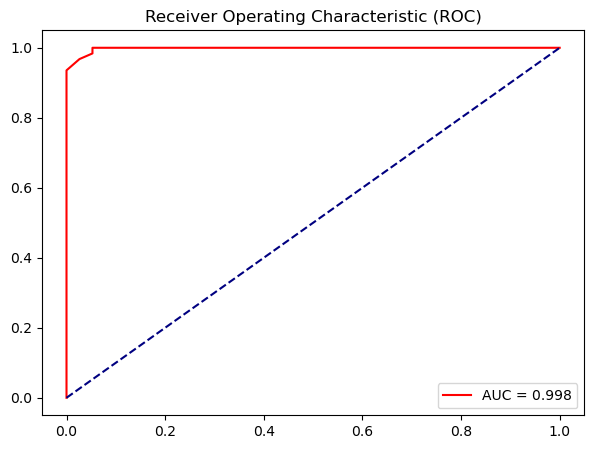

In [14]:
# Predictions for the test set
y_pred = final_knn.predict(X_test)
y_proba = final_knn.predict_proba(X_test)[:, 1]

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: CKD vs Healthy')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

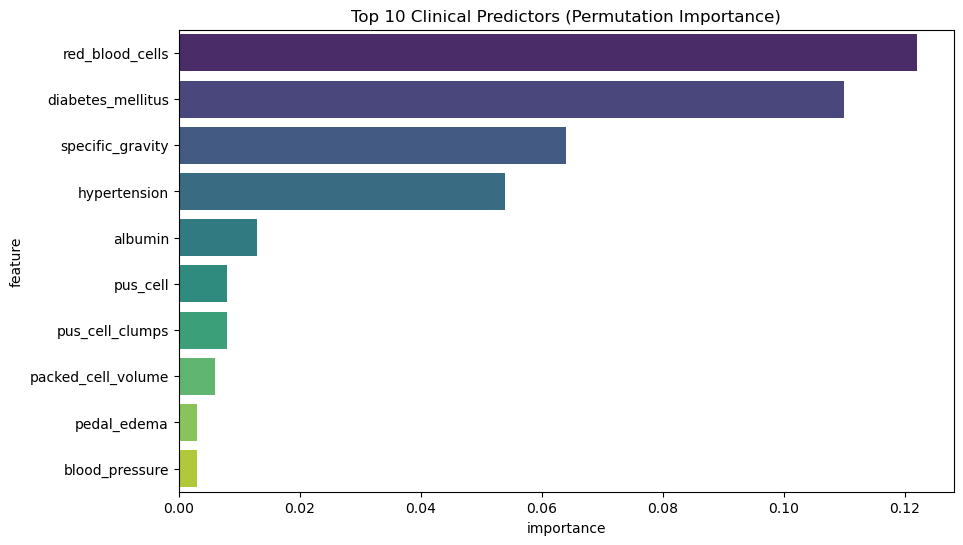

In [15]:
from sklearn.inspection import permutation_importance

# Calculate Permutation Importance
results = permutation_importance(final_knn, X_test, y_test, n_repeats=10, random_state=42)

# Create a clean DataFrame for plotting
feat_imp = pd.DataFrame({'feature': X.columns, 'importance': results.importances_mean})
feat_imp = feat_imp.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_imp, hue='feature', palette='viridis', legend=False)
plt.title('Top 10 Clinical Predictors (Permutation Importance)')
plt.show()